# ME581 HW1 Solution [PYTHON]

Three scripts are defined here and will be used in the following homework problems.

The first script applies the Bisection Method algorithm defined in Section 2.3 of the textbook. The script takes in an absolute error tolerance $eps$, a defined function $func$, interval extremes $a$ and $b$, and a maximum number of iterations $Nmax$, and returns an array $pn$ of approximations to the root.

In [1]:
def bisection(eps,func,a,b,Nmax):
   
   import numpy as np
   
   pn = np.zeros(Nmax)
   pn.fill(np.nan)
   
   sfa = np.sign(func(a))
   
   for ii in range(0,Nmax):
      pn[ii] = a + (b-a)/2.0
      
      if ((b-a) < (2.0*eps)):
         print("The convergence tolerance has been met")
         print("after {0:d} iterations".format(ii+1))
         pn = pn[~np.isnan(pn)]
         return(pn)
      
      sfp = np.sign(func(pn[ii]))
      if ( (sfa*sfp) < 0.0 ):
         b = pn[ii]
      else:
         a = pn[ii]
         sfa = np.sign(func(a))
   
   print("The convergence tolerance has not been met")
   print("after Nmax = {0:d} iterations".format(Nmax))
   return(pn)

The second script applies the Newton's Method algorithm defined in Section 2.4 of the textbook. The script takes in a defined function $f$, the derivative $fp$ of that function, an initial estimate $p0$ of the root, a maximum number of iterations $Nmax$, and an absolute error tolerance $eps$, and returns an array $pn$ of approximations to the root.

In [2]:
def newton(f,fp,po,Nmax,eps):

   import numpy as np
   
   def g(x,f,fp):
      gx = x - f(x)/fp(x)
      return(gx)
   
   pn = np.zeros(Nmax+1)
   pn.fill(np.nan)
   pn[0] = po
   
   for ii in range(1,Nmax+1):
      pn[ii] = g(pn[ii-1],f,fp)
      if ( abs( pn[ii]-pn[ii-1] ) < eps ):
         print("The convergence tolerance has been met")
         print("after {0:d} iterations".format(ii))
         pn = pn[~np.isnan(pn)]
         return(pn)
   
   print("The convergence tolerance has not been met")
   print("after Nmax = {0:d} iterations".format(Nmax))
   return(pn)

The third script applies the Secant Method algorithm defined in Section 2.5 of the textbook. It takes in a defined function $f$, initial estimates $p0$ and $p1$ of the root, a maximum number of iterations $Nmax$, and an absolute error tolerance $eps$, and returns an array $pn$ of approximations to the root.

In [3]:
def secant(f,p0,p1,Nmax,eps):

   import numpy as np
   
   def g(p0,p1,f):
      gx = p1 - f(p1) * ( p1 - p0 ) / ( f(p1) - f(p0) )
      return(gx)
   
   pn = np.zeros(Nmax+2)
   pn.fill(np.nan)
   
   pn[0] = p0
   pn[1] = p1
   
   for ii in range(2,Nmax+2):
      pn[ii] = g(pn[ii-2],pn[ii-1],f)
      if ( abs( pn[ii]-pn[ii-1] ) < eps ):
         print("The convergence tolerance has been met")
         print("after {0:d} iterations".format(ii))
         pn = pn[~np.isnan(pn)]
         return(pn)
         
   print("The convergence tolerance has not been met")
   print("after Nmax = {0:d} iterations".format(Nmax))
   return(pn)

Three modules will also be used throughout, and these are imported here:

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches

## Problem 1

Problem Statement:

Verify that the function $f(x)=x^{3}+x^{2}-3x-3$ has a zero on the interval $(1,2)$ by plotting the function. Next, perform the first five iterations of the bisection algorithm and verify that each approximation satisfies the theoretical error bound of the bisection algorithm, but that the actual errors do not steadily decrease. The exact location of the zero is given as $p=\sqrt{3}$.

Solution:

The given function $f(x)$ is defined below and plotted below across the interval $(a,b)=(1,2)$.

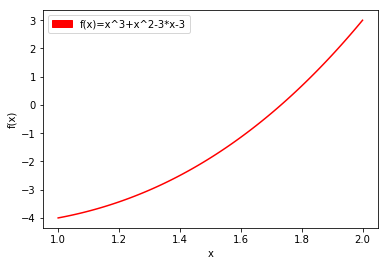

In [5]:
def f1(x):
    f1x = x**3.0 + x**2.0 - 3.0*x - 3.0
    return f1x

x1= np.linspace(1,2,101)
f_array1 = f1(x1)

plt.plot(x1,f_array1,'r')

red_patch = mpatches.Patch(color='red',label='f(x)=x^3+x^2-3*x-3')
plt.legend(handles=[red_patch])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

A root $f(x)=0$ is seen in the range of $x=1.7$.

The 'bisection' script is used to calculate the first five approximations to the root $p$.

In [6]:
a1 = 1.0
b1 = 2.0
Nmax1 = 5
eps1 = 1.0 * 10.0**-16.0 # Small so Nmax will be met
pn1 = bisection(eps1,f1,a1,b1,Nmax1)

The convergence tolerance has not been met
after Nmax = 5 iterations


A table is created to show the iteration number $n$, the approximations $p_{n}$ to the root $p$, the absolute error $e=|p_{n}-p|$ in the approximation, and the theoretical error bound $\frac{b-a}{2^{n}}$ defined in section 2.3 of the textbook.

In [7]:
p1 = np.sqrt(3.0)
n1 = np.linspace(1,Nmax1,Nmax1)
e1 = abs( pn1-p1 )
eb1 = (b1-a1) / (2.0**n1)

print("Iter.\t\tApprox.\t\tAbs. Error\tTheor. Bound")
print("n\t\tp_n\t\t|e|\t\t(b-a)/(2^n)\n")

for ii in range(0,Nmax1):
   print("{0:f}\t{1:f}\t{2:f}\t{3:f}".\
    format(n1[ii],pn1[ii],e1[ii],eb1[ii]))

Iter.		Approx.		Abs. Error	Theor. Bound
n		p_n		|e|		(b-a)/(2^n)

1.000000	1.500000	0.232051	0.500000
2.000000	1.750000	0.017949	0.250000
3.000000	1.625000	0.107051	0.125000
4.000000	1.687500	0.044551	0.062500
5.000000	1.718750	0.013301	0.031250


As suggested, the absolute error $|e|$ in the third column does not decrease on every iteration.

Comparing the third and fourth columns, it is seen that the absolute error $|e|$ is always smaller than the theoretical error bound $\frac{b-a}{2^{n}}$.

## Problem 2

Problem Statement:

Verify that the function $f(x)=x^{6}-3$ has a zero on the interval $(a,b)=(1,2)$. Next, perform the first five iterations of the bisection algorithm and verify that each approximation satisfies the theoretical error bound of the bisection method.

Solution:

The given function $f(x)$ is defined below and plotted below across the interval $(a,b)=(1,2)$.

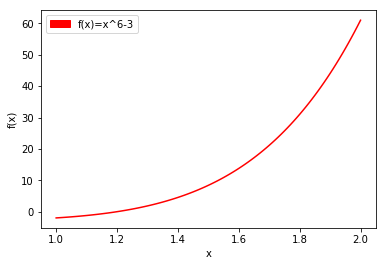

In [8]:
def f2(x):
    f2x = x**6.0 - 3.0
    return f2x

x2= np.linspace(1,2,101)
f_array2 = f2(x2)

plt.plot(x2,f_array2,'r')

red_patch = mpatches.Patch(color='red',label='f(x)=x^6-3')
plt.legend(handles=[red_patch])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

A root $f(x)=0$ is seen in the range of $x=1.2$.

The 'bisection' script is used to calculate the first five approximations to the root $p$.

In [9]:
a2 = 1.0
b2 = 2.0
Nmax2 = 5
eps2 = 1.0 * 10.0**-16.0
pn2 = bisection(eps2,f2,a2,b2,Nmax2)

The convergence tolerance has not been met
after Nmax = 5 iterations


A table is created to show the iteration number $n$, the approximations $p_{n}$ to the root $p$, the absolute error $e=|p_{n}-p|$ in the approximation, and the theoretical error bound $\frac{b-a}{2^{n}}$.

In [10]:
p2 = 3.0**(1.0/6.0)
n2 = np.linspace(1,Nmax2,Nmax2)
e2 = abs( pn2-p2 )
eb2 = (b2-a2) / (2.0**n2)

print("Iter.\t\tApprox.\t\tAbs. Error\tTheor. Bound")
print("n\t\tp_n\t\t|e|\t\t(b-a)/(2^n)\n")

for ii in range(0,Nmax2):
   print("{0:f}\t{1:f}\t{2:f}\t{3:f}".\
    format(n2[ii],pn2[ii],e2[ii],eb2[ii]))

Iter.		Approx.		Abs. Error	Theor. Bound
n		p_n		|e|		(b-a)/(2^n)

1.000000	1.500000	0.299063	0.500000
2.000000	1.250000	0.049063	0.250000
3.000000	1.125000	0.075937	0.125000
4.000000	1.187500	0.013437	0.062500
5.000000	1.218750	0.017813	0.031250


Comparing the third and fourth columns, it is seen that the absolute error $|e|$ is always smaller than the theoretical error bound $\frac{b-a}{2^{n}}$.

## Problem 3

Problem Statement:

Approximate $\frac{1}{37}$ to five decimal places by applying the bisection algorithm to the equation $\frac{1}{x}-37=0$. Include plots of the

a) Approximated Root vs Iteration Number

b) Absolute Error vs Iteration Number

Solution:

Care is taken in choosing the initial interval; an interval which requires evaluating the function $f(x)=\frac{1}{x}-37$ at $x=0$ will result in division by zero.

Initial bounds of $(a,b)=(\frac{1}{40}=0.025,\frac{1}{20}=0.05)$ are chosen because they encompass $\frac{1}{37}$ and because their decimal values are easily called to mind and written.

It is noted that the first significant digits of $\frac{1}{40}$ and $\frac{1}{20}$ are both two places after the decimal The first significant digit of $\frac{1}{37}$ is expected at the same location. The fifth significant digit of $\frac{1}{37}$ may then be expected at the sixth decimal place.

The bounds of the solution, upon convergence, must therefore given by $(b-a)=1*10^{-6}=2{\epsilon}$. Solving for the convergence tolerance epsilon in that equation, a convergence tolerance of ${\epsilon}=5*10^{-7}$ must be chosen.

The 'bisection' script is applied to estimate the root $p$.

In [11]:
def f3(x):
    f3x = 1/x - 37.0
    return f3x

a3 = 0.025 # 1/40
b3 = 0.050 # 1/20
Nmax3 = 1000
eps3 = 5.0*10**-7

pn3 = bisection(eps3,f3,a3,b3,Nmax3)

print("\npn is printed to ten digits.")
print("The first five digits are significant.")
print("pn ≈ {0:10.9e}".format(pn3[-1]))

The convergence tolerance has been met
after 16 iterations

pn is printed to ten digits.
The first five digits are significant.
pn ≈ 2.702674866e-02


The approximated root $p_{n}$ is plotted against the iteration number $n$.

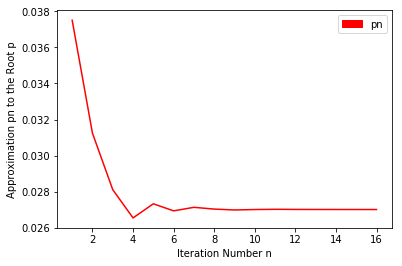

In [12]:
n3 = np.linspace(1,len(pn3),len(pn3))

plt.plot(n3,pn3,'r')

red_patch = mpatches.Patch(color='red',label='pn')
plt.legend(handles=[red_patch])
plt.xlabel('Iteration Number n')
plt.ylabel('Approximation pn to the Root p')
plt.show()

The exact error $p-p_{n}$ is plotted against the iteration number $n$.

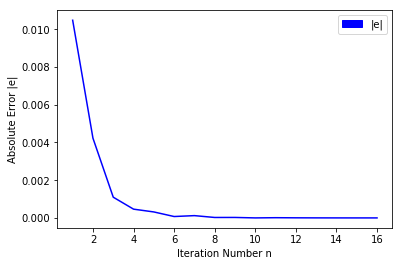

In [13]:
p3 = 1.0/37.0
e3 = abs(p3-pn3)

plt.plot(n3,e3,'b')

blue_patch = mpatches.Patch(color='blue',label='|e|')
plt.legend(handles=[blue_patch])
plt.xlabel('Iteration Number n')
plt.ylabel('Absolute Error |e|')
plt.show()

## Problem 4

Problem Statement:

The equation $x^{7}=3$ has a root on the interval $(1,2)$, namely $\sqrt[7]{3}$.

a) Perform five iterations of Newton's method.

b) For $n{\geq}1$, compare $|p_{n}-p_{n-1}|$ with $|p_{n-1}-p|$ and $|p_{n}-p|$.

c) For $n{\geq}1$, compute the ratio $\frac{|p_{n}-p|}{{|p_{n-1}-p|}^{2}}$ and show that this value approaches $|\frac{f''(p)}{2f'(p)}|$.

Solution:

The 'newton' script is used to calculate the first five approximations to the root $p$, and the resulting approximations to the root 'p' are printed.

In [14]:
def f4(x):
   f4x = x**7.0 - 3.0
   return(f4x)

def fp4(x):
   fp4x = 7.0*x**6.0
   return(fp4x)

po4 = 1.5
Nmax4 = 5
eps4 = 1.0*10.0**-16.0
pn4 =  newton(f4,fp4,po4,Nmax4,eps4)

print("\nApproximations of the Root p:")
for ii in range(0,len(pn4)):
   print("Iteration {0:d}: pn({1:d}) = {2:9.8e}"\
    .format(ii,ii,pn4[ii]))

The convergence tolerance has not been met
after Nmax = 5 iterations

Approximations of the Root p:
Iteration 0: pn(0) = 1.50000000e+00
Iteration 1: pn(1) = 1.32333921e+00
Iteration 2: pn(2) = 1.21408951e+00
Iteration 3: pn(3) = 1.17446752e+00
Iteration 4: pn(4) = 1.16998305e+00
Iteration 5: pn(5) = 1.16993082e+00


As requested, for $n{\geq}1$, the values in $|p_{n}-p_{n-1}|$ are tabled with $|p_{n-1}-p|$ and $|p_{n}-p|$.

In [15]:
print("n\t|p_(n)-p_(n-1)|\t|p_(n-1)-p|\t|p_(n)-p|")

p4 = (3.0)**(1.0/7.0)

pnpn1 = np.zeros(len(pn4)-1)
pnpn1.fill(np.nan)
pn1p = np.zeros(len(pn4)-1)
pn1p.fill(np.nan)
pnp = np.zeros(len(pn4)-1)
pnp.fill(np.nan)

for ii in range(1,len(pn4)):
   pnpn1[ii-1] = abs(pn4[ii]-pn4[ii-1])
   pn1p [ii-1] = abs(pn4[ii-1]-p4)
   pnp[ii-1]   = abs(pn4[ii]-p4)

for ii in range(0,len(pn4)-1):
   print("{0:d}\t{1:10.9e}\t{2:10.9e}\t{3:10.9e}".\
    format(ii+1,pnpn1[ii],pn1p[ii],pnp[ii]))

n	|p_(n)-p_(n-1)|	|p_(n-1)-p|	|p_(n)-p|
1	1.766607878e-01	3.300691872e-01	1.534083995e-01
2	1.092497019e-01	1.534083995e-01	4.415869755e-02
3	3.962199086e-02	4.415869755e-02	4.536706690e-03
4	4.484470983e-03	4.536706690e-03	5.223570761e-05
5	5.222871170e-05	5.223570761e-05	6.995911850e-09


For $n{\geq}1$, the ratio $\frac{|p_{n}-p|}{{|p_{n-1}-p|}^{2}}$ is computed and printed.

In [16]:
pnp_pn1p_ratio = pnp / pn1p**2.0

print("Ratio |p_(n)-p| / |p_(n-1)-p|")
for ii in range(0,len(pnp)):
   print("Iteration {0:d}: {1:10.9e}".\
    format(ii+1,pnp_pn1p_ratio[ii]))

Ratio |p_(n)-p| / |p_(n-1)-p|
Iteration 1: 1.408118393e+00
Iteration 2: 1.876367827e+00
Iteration 3: 2.326527503e+00
Iteration 4: 2.537967629e+00
Iteration 5: 2.563948892e+00


This value is expected to approach $|\frac{f''(p)}{2f'(p)}|$.

The value of $|\frac{f''(p)}{2f'(p)}|$ is found by first calculating the derivatives of $f(x)$:

$f(x) = x^{7}-3$; $f'(x) = 7x^{6}$; $f''(x) = 42x^{5}$

Noting that the exact root is at $p=\sqrt[7]{3}$, the value of $|\frac{f''(p)}{2f'(p)}|$ is:

$|\frac{f''(p)}{2f'(p)}|=\frac{42{(\sqrt[7]{3})}^{5}}{2{\times}7{(\sqrt[7]{3})}^{6}}{\approx}$

In [17]:
ans = (42.0*(3.0**(1.0/7.0))**5.0) /(2.0*7.0*(3.0**(1.0/7.0))**6.0)
print("{0:10.9f}".format(ans))

2.564254200


which is identical in the first three digits to the final value of the ratio $\frac{|p_{n}-p|}{{|p_{n-1}-p|}^{2}}=2.563948892$ shown above.

## Problem 5

Problem Statement:

For each of the functions given below, use the Newton's method algorithm to approximate all real roots. Use an absolute tolerance of $10^{-6}$ as a stopping condition. For each of the roots plot the logarithm of the error $e_{n}$ at each iteration $n$ against the logarithm of the error at the previous iteration, and use this plot to calculate the order of convergence. Use these plots to comment on the convergence behavior of Newton's method.

a) $f(x)=e^{x}+x^{2}-x-4$

b) $f(x)=x^{3}-x^{2}-10x+7$

c) $f(x)=1.05-1.04x+ln(x)$

Solution:

For part $a$, two roots are expected because the polynomial is second-order. Through trial and error, these roots have been found to be in the range (-2,2). The function is plotted in that region to demonstrate:

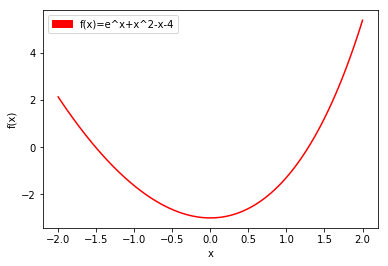

In [18]:
def f5a(x):
    f5ax = np.exp(x) + x**2.0 - x - 4.0
    return(f5ax)

x5a= np.linspace(-2,2,101)
f_array5a = f5a(x5a)

plt.plot(x5a,f_array5a,'r')

red_patch = mpatches.Patch(color='red',label='f(x)=e^x+x^2-x-4')
plt.legend(handles=[red_patch])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Roots where $f(x)=0$ are seen near $x=-1.5$ and $x=1.25$.

The derivative of $f(x)$ is required and is calculated as $f'(x)=e^{x}+2x-1$

Applying Newton's method with initial guesses of $p_{0}^{(5a1)}=-1.5$ and $p_{0}^{(5a2)}=1.25$ and the given absolute tolerance of ${\epsilon}=10^{-6}$, the roots are calculated and the logarithmic plots of the error are graphed.

The convergence tolerance has been met
after 3 iterations
The convergence tolerance has been met
after 3 iterations

Final approximation of the first root of f(x):
pn(4) = -1.507099484e+00

Final approximation of the second root of f(x):
pn(4) = 1.288677967e+00


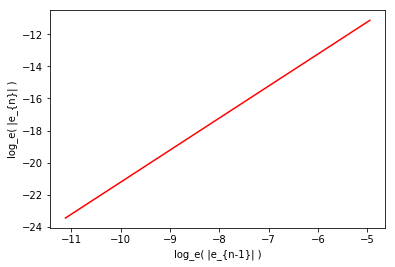

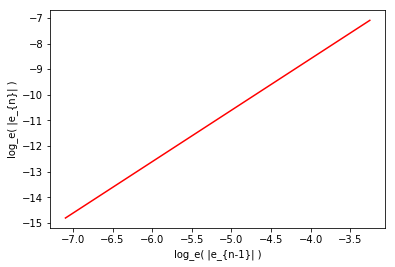

In [19]:
def fp5a(x):
   fp5ax = np.exp(x) + 2.0*x - 1.0
   return(fp5ax)

eps5a1 = 10**-6.0
eps5a2 = 10**-6.0

po5a1 = -1.5
po5a2 = 1.25

Nmax5a1 = 100
Nmax5a2 = 100

pn5a1 =  newton(f5a,fp5a,po5a1,Nmax5a1,eps5a1)
pn5a2 =  newton(f5a,fp5a,po5a2,Nmax5a2,eps5a2)

print("\nFinal approximation of the first root of f(x):")
print("pn({0:d}) = {1:10.9e}".format(len(pn5a1),pn5a1[-1]))
print("\nFinal approximation of the second root of f(x):")
print("pn({0:d}) = {1:10.9e}".format(len(pn5a2),pn5a2[-1]))

p5a1 = pn5a1[-1]
p5a2 = pn5a2[-1]

logabs_en5a1  = np.log(abs( pn5a1[1:-1] - p5a1 ))
logabs_en15a1 = np.log(abs( pn5a1[0:-2] - p5a1 ))
logabs_en5a2  = np.log(abs( pn5a2[1:-1] - p5a2 ))
logabs_en15a2 = np.log(abs( pn5a2[0:-2] - p5a2 ))

plt.plot(logabs_en15a1,logabs_en5a1,'r')
plt.xlabel('log_e( |e_{n-1}| )')
plt.ylabel('log_e( |e_{n}| )')
plt.show()
plt.plot(logabs_en15a2,logabs_en5a2,'r')
plt.xlabel('log_e( |e_{n-1}| )')
plt.ylabel('log_e( |e_{n}| )')
plt.show()

For part $b$, three roots are expected because the polynomial is third-order. Through trial and error, these roots have been found to be in the range (-4,4). The function is plotted in that region to demonstrate:

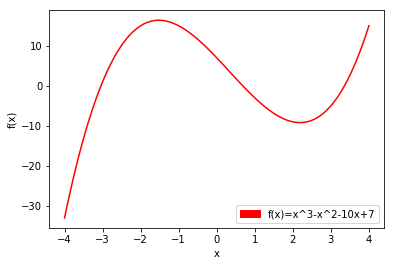

In [20]:
def f5b(x):
    f5bx = x**3.0 - x**2 - 10.0*x + 7.0
    return(f5bx)

x5b= np.linspace(-4,4,101)
f_array5b = f5b(x5b)

plt.plot(x5b,f_array5b,'r')

red_patch = mpatches.Patch(color='red',label='f(x)=x^3-x^2-10x+7')
plt.legend(handles=[red_patch])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Roots where $f(x)=0$ are seen near $x=-3$, $x=1$, and $x=3$.

The derivative of $f(x)$ is required and is calculated as $f'(x)=3x^{2}-2x-10$

Applying Newton's method with initial guesses of $p_{0}^{(5b1)}=-3$, $p_{0}^{(5b2)}$, and $p_{0}^{(5b3)}=3.0$ and the given absolute tolerance of ${\epsilon}=10^{-6}$, the roots are calculated and the logarithmic plots of the error are graphed.

The convergence tolerance has been met
after 3 iterations
The convergence tolerance has been met
after 4 iterations
The convergence tolerance has been met
after 5 iterations

Final approximation of the first root of f(x):
pn(4) = -3.042682784e+00

Final approximation of the second root of f(x):
pn(5) = 6.852202474e-01

Final approximation of the third root of f(x):
pn(6) = 3.357462537e+00


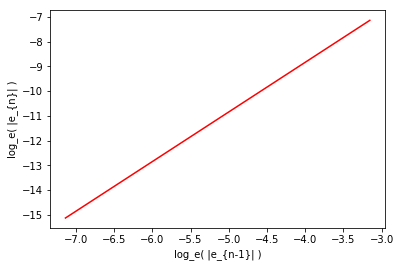

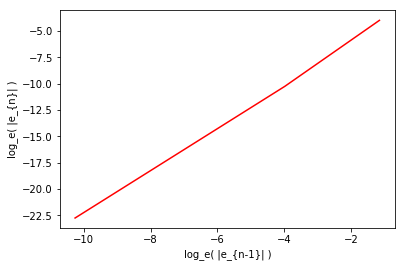

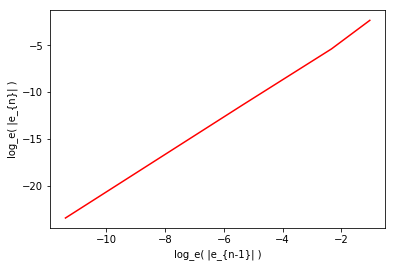

In [21]:
def fp5b(x):
   fp5bx = 3.0*x**2.0 - 2.0*x-10.0
   return(fp5bx)

eps5b1 = 10**-6.0
eps5b2 = 10**-6.0
eps5b3 = 10**-6.0

po5b1 = -3.0
po5b2 = 1.0
po5b3 = 3.0

Nmax5b1 = 100
Nmax5b2 = 100
Nmax5b3 = 100

pn5b1 =  newton(f5b,fp5b,po5b1,Nmax5b1,eps5b1)
pn5b2 =  newton(f5b,fp5b,po5b2,Nmax5b2,eps5b2)
pn5b3 =  newton(f5b,fp5b,po5b3,Nmax5b3,eps5b3)

print("\nFinal approximation of the first root of f(x):")
print("pn({0:d}) = {1:10.9e}".format(len(pn5b1),pn5b1[-1]))
print("\nFinal approximation of the second root of f(x):")
print("pn({0:d}) = {1:10.9e}".format(len(pn5b2),pn5b2[-1]))
print("\nFinal approximation of the third root of f(x):")
print("pn({0:d}) = {1:10.9e}".format(len(pn5b3),pn5b3[-1]))

p5b1 = pn5b1[-1]
p5b2 = pn5b2[-1]
p5b3 = pn5b3[-1]

logabs_en5b1  = np.log(abs( pn5b1[1:-1] - p5b1 ))
logabs_en15b1 = np.log(abs( pn5b1[0:-2] - p5b1 ))
logabs_en5b2  = np.log(abs( pn5b2[1:-1] - p5b2 ))
logabs_en15b2 = np.log(abs( pn5b2[0:-2] - p5b2 ))
logabs_en5b3  = np.log(abs( pn5b3[1:-1] - p5b3 ))
logabs_en15b3 = np.log(abs( pn5b3[0:-2] - p5b3 ))

plt.plot(logabs_en15b1,logabs_en5b1,'r')
plt.xlabel('log_e( |e_{n-1}| )')
plt.ylabel('log_e( |e_{n}| )')
plt.show()

plt.plot(logabs_en15b2,logabs_en5b2,'r')
plt.xlabel('log_e( |e_{n-1}| )')
plt.ylabel('log_e( |e_{n}| )')
plt.show()

plt.plot(logabs_en15b3,logabs_en5b3,'r')
plt.xlabel('log_e( |e_{n-1}| )')
plt.ylabel('log_e( |e_{n}| )')
plt.show()

For part 'c', through trial and error, the real roots have been found to be in the range (0.5,1.5). The function is plotted in that region to demonstrate:

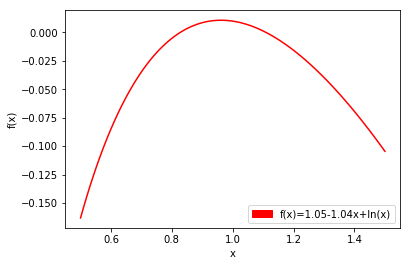

In [22]:
def f5c(x):
    f5cx = 1.05-1.04*x+np.log(x)
    return(f5cx)

x5c= np.linspace(0.5,1.5,101)
f_array5c = f5c(x5c)

plt.plot(x5c,f_array5c,'r')

red_patch = mpatches.Patch(color='red',label=\
 'f(x)=1.05-1.04x+ln(x)')
plt.legend(handles=[red_patch])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Roots where $f(x)=0$ are seen near $x=0.8$ and $x=1.1$.

The derivative of $f(x)$ is required and is calculated as $f'(x)=-1.04+\frac{1}{x}$

Applying Newton's method with initial guesses of $p_{0}^{(5c1)}=0.8$ and $p_{0}^{(5c2)}=1.1$ and the given absolute tolerance of ${\epsilon}=10^{-6}$, the roots are calculated and the logarithmic plots of the error are graphed.

The convergence tolerance has been met
after 4 iterations
The convergence tolerance has been met
after 3 iterations

Final approximation of the first root of f(x):
pn(5) = 8.271809085e-01

Final approximation of the second root of f(x):
pn(4) = 1.109712304e+00


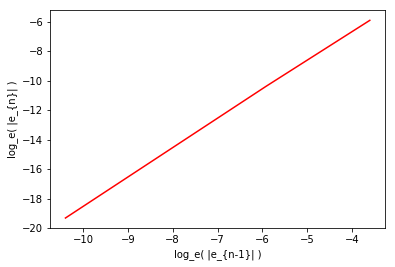

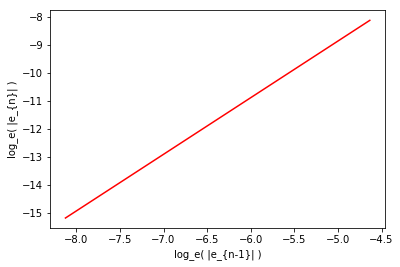

In [23]:
def fp5c(x):
   fp5cx = -1.04 + 1.0/x
   return(fp5cx)

eps5c1 = 10**-6.0
eps5c2 = 10**-6.0

po5c1 = 0.8
po5c2 = 1.1

Nmax5c1 = 100
Nmax5c2 = 100

pn5c1 =  newton(f5c,fp5c,po5c1,Nmax5c1,eps5c1)
pn5c2 =  newton(f5c,fp5c,po5c2,Nmax5c2,eps5c2)

print("\nFinal approximation of the first root of f(x):")
print("pn({0:d}) = {1:10.9e}".format(len(pn5c1),pn5c1[-1]))
print("\nFinal approximation of the second root of f(x):")
print("pn({0:d}) = {1:10.9e}".format(len(pn5c2),pn5c2[-1]))

p5c1 = pn5c1[-1]
p5c2 = pn5c2[-1]

logabs_en5c1  = np.log(abs( pn5c1[1:-1] - p5c1 ))
logabs_en15c1 = np.log(abs( pn5c1[0:-2] - p5c1 ))
logabs_en5c2  = np.log(abs( pn5c2[1:-1] - p5c2 ))
logabs_en15c2 = np.log(abs( pn5c2[0:-2] - p5c2 ))

plt.plot(logabs_en15c1,logabs_en5c1,'r')
plt.xlabel('log_e( |e_{n-1}| )')
plt.ylabel('log_e( |e_{n}| )')
plt.show()

plt.plot(logabs_en15c2,logabs_en5c2,'r')
plt.xlabel('log_e( |e_{n-1}| )')
plt.ylabel('log_e( |e_{n}| )')
plt.show()

The order of convergence in each of the plots is judged visually  from the slope and is found to be approximately two (quadratic) in each case.

From this, it appears that the Newton's method is often quadratically convergent.

## Problem 6

Problem Statement:

Consider the function $f(x)=(3x)(1-cos({\pi}x))$, which has a root of multiplicity three at $x=0$. Apply ten iterations of Newton's method to this equation with a starting value of $p_{0}=0.5$. Comment on the order of convergence.

Solution:

The derivative of the given function $f(x)$ is required. The product rule is applied to find:

$f'(x)=(3x)({\pi}sin({\pi}x))+3(1-cos({\pi}x))$

Ten iterations of Newton's method are applied for the given equation and starting point, and the estimates of the root are printed out.

The order of convergence is judged by plotting the logarithm of the absolute error.

The convergence tolerance has not been met
after Nmax = 10 iterations

Approximations of the Root p:
Iteration 0: pn(0) = 5.00000000e-01
Iteration 1: pn(1) = 3.05507735e-01
Iteration 2: pn(2) = 1.98088156e-01
Iteration 3: pn(3) = 1.30597234e-01
Iteration 4: pn(4) = 8.66527045e-02
Iteration 5: pn(5) = 5.76489104e-02
Iteration 6: pn(6) = 3.83975067e-02
Iteration 7: pn(7) = 2.55879799e-02
Iteration 8: pn(8) = 1.70555898e-02
Iteration 9: pn(9) = 1.13694862e-02
Iteration 10: pn(10) = 7.57938884e-03


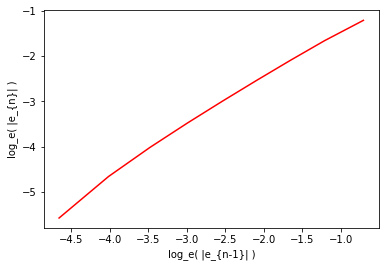

In [24]:
def f6(x):
   f6x = (3.0*x)*(1.0-np.cos(np.pi*x))
   return(f6x)

def fp6(x):
   fp6x = (3.0*x)*(np.pi*np.sin(np.pi*x)) + 3.0*(1.0-np.cos(np.pi*x))
   return(fp6x)

po6 = 0.5
Nmax6 = 10
eps6 = 1.0 * 10.0**-16.0

pn6 = newton(f6,fp6,po6,Nmax6,eps6)

print("\nApproximations of the Root p:")
for ii in range(0,len(pn6)):
   print("Iteration {0:d}: pn({1:d}) = {2:9.8e}"\
    .format(ii,ii,pn6[ii]))

p6 = pn6[-1]

logabs_en6  = np.log(abs( pn6[1:-1] - p6 ))
logabs_en16 = np.log(abs( pn6[0:-2] - p6 ))

plt.plot(logabs_en16,logabs_en6,'r')
plt.xlabel('log_e( |e_{n-1}| )')
plt.ylabel('log_e( |e_{n}| )')
plt.show()

The order of convergence is found from the slope of the plot to be approximately one (linear). This is explained by the fact that the multiplicity of the root is three; for roots with a multiplicity greater than one, Newton's method gives approximately linear convergence.

## Problem 7

Problem Statement:

The function $f(x)=sin(x)$ has a zero on the interval $(3,4)$, namely $x=\pi$. Perform three iterations of Newton's method to approximate this zero, using $p_{0}=4$. Determine the absolute error in each of the computed approximations. What is the apparent order of convergence? What explanation can you provide for this behavior?

Solution:

The derivative of the given function $f(x)$ is required and is found to be:

$f'(x)=cos(x)$

Three iterations of Newton's method are applied to the given equation using the specified initial estimate.

The logarithm of the absolute error is plotted to estimate the order of convergence.

The convergence tolerance has not been met
after Nmax = 3 iterations

Approximations of the Root p:
Iteration 0: pn(0) = 4.00000000e+00
Iteration 1: pn(1) = 2.84217872e+00
Iteration 2: pn(2) = 3.15087294e+00
Iteration 3: pn(3) = 3.14159239e+00


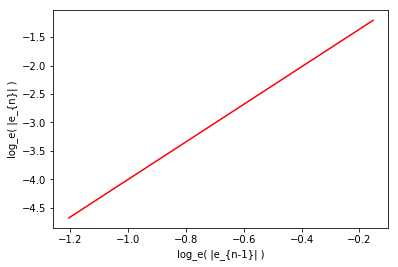

In [25]:
def f7(x):
   f7x = np.sin(x)
   return(f7x)

def fp7(x):
   fp7x = np.cos(x)
   return(fp7x)

po7 = 4.0
Nmax7 = 3
eps7 = 1.0 * 10.0**-16.0

pn7 = newton(f7,fp7,po7,Nmax7,eps7)

print("\nApproximations of the Root p:")
for ii in range(0,len(pn7)):
   print("Iteration {0:d}: pn({1:d}) = {2:9.8e}"\
    .format(ii,ii,pn7[ii]))

p7 = pn7[-1]

logabs_en7  = np.log(abs( pn7[1:-1] - p7 ))
logabs_en17 = np.log(abs( pn7[0:-2] - p7 ))

plt.plot(logabs_en17,logabs_en7,'r')
plt.xlabel('log_e( |e_{n-1}| )')
plt.ylabel('log_e( |e_{n}| )')
plt.show()

The order of convergence is found from the slope of the plot to be approximately three (cubic).

This is explained as follows. The multiplicity of the root at $p=\pi$ is one, as demonstrated by the fact that function $f(x)=sin(x)$ is zero at the root $p=\pi$:

$f(p)=sin(\pi)=0$

but its derivative is nonzero at the root $p=\pi$:

$f'(p)=cos(\pi)=-1$

Because the multiplicity of the root at $p=\pi$ is one, the convergence for Newton's method is expected to be at least quadratic.

As stated on page 91 in Section 2.3 of the textbook, "the more derivatives of the iteration function which are zero at the fixed point, the higher will be the order of convergence."

It is noted that the second derivative of the iteration function $g(x)=x-\frac{sin(x)}{cos(x)}$ is zero at the root:

$g''(p)=-\frac{sin(\pi)}{cos(\pi)}-\frac{sin^{\pi}(x)}{cos^{3}(\pi)}=0$

which explains the super-quadratic convergence.

## Problem 8

Problem Statement:

(a) Verify that the equation $x^{4}-18x^{2}+45=0$ has a root on the interval $1,2$. Next, perform three iterations of Newton's method, with $p_{0}=1$. Given that the exact value of the root is $x=\sqrt{3}$, compute the absolute error in the approximations just obtained. What is the apparent order of convergence? What explanation can you provide for this behavior?

(b) Verify that the equation $x^{4}-18x^{2}+45=0$ also has a root on the interval $(3,4)$. Perform five iterations of Newton's method, and compute the absolute error in eah approximation. The exact value of the root is $x=\sqrt{15}$. What is the apparent order of convergence in this case?

(c) What explanation can you provide for the different convergence behavior between parts (a) and (b)?

Solution:

The root on the interval $(1,2)$ is graphically verified.

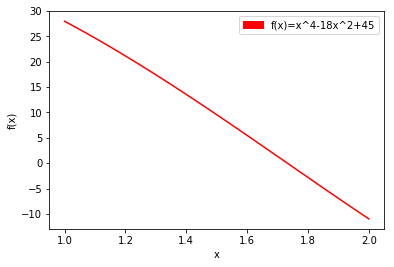

In [26]:
def f8a(x):
   f8ax = x**4.0-18.0*x**2.0 + 45.0
   return(f8ax)

x8a= np.linspace(1.0,2.0,101)
f_array8a = f8a(x8a)

plt.plot(x8a,f_array8a,'r')

red_patch = mpatches.Patch(color='red',label='f(x)=x^4-18x^2+45')
plt.legend(handles=[red_patch])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

A root where $f(x)=0$ is seen in the vicinity of $x=1.7$.

The derivative of the given function $f(x)$ is required and is found to be

$f'(x)=4x^{3}-36x$

Three iterations of Newton's method are performed with the given starting value $p_{0}=1$.

The order of convergence is judged by plotting the logarithm of the absolute error.

The convergence tolerance has not been met
after Nmax = 3 iterations

Approximations of the Root p:
Iteration 0: pn(0) = 1.00000000e+00
Iteration 1: pn(1) = 1.87500000e+00
Iteration 2: pn(2) = 1.73103632e+00
Iteration 3: pn(3) = 1.73205081e+00

Absolute Error in the Approximations p:
Iteration 0: pn(0) = 7.32050808e-01
Iteration 1: pn(1) = 1.42949192e-01
Iteration 2: pn(2) = 1.01448278e-03
Iteration 3: pn(3) = 3.47950557e-10


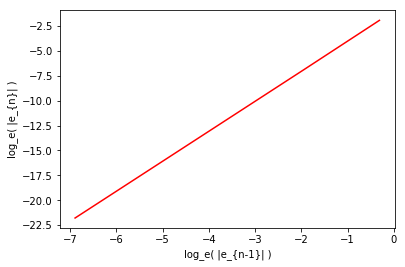

In [27]:
def fp8a(x):
   fp8ax = 4.0*x**3.0-36.0*x
   return(fp8ax)

po8a = 1.0
Nmax8a = 3
eps8a = 1.0 * 10.0**-16.0

pn8a = newton(f8a,fp8a,po8a,Nmax8a,eps8a)

print("\nApproximations of the Root p:")
for ii in range(0,len(pn8a)):
   print("Iteration {0:d}: pn({1:d}) = {2:9.8e}"\
    .format(ii,ii,pn8a[ii]))

p8a = np.sqrt(3.0)

abs_e8a = np.abs(pn8a-p8a)
print("\nAbsolute Error in the Approximations p:")
for ii in range(0,len(abs_e8a)):
   print("Iteration {0:d}: pn({1:d}) = {2:9.8e}"\
    .format(ii,ii,abs_e8a[ii]))

logabs_en8a  = np.log(abs( pn8a[1:] - p8a ))
logabs_en18a = np.log(abs( pn8a[0:-1] - p8a ))

plt.plot(logabs_en18a,logabs_en8a,'r')
plt.xlabel('log_e( |e_{n-1}| )')
plt.ylabel('log_e( |e_{n}| )')
plt.show()

The order of convergence is found from the slope of the plot to be approximately three (cubic). As in Problem 7, this is explained by the multiplicity of one at this root, shown by the nonzero derivative of the function at the root:

$f'(p)=4(\sqrt{3})^{3}-36\sqrt{3}{\approx}-41.6$

and by the zero for the second derivative of the iteration function $g(x)=x-\frac{x^{4}-18x^{2}+45}{4x^{3}-36x}$ at the root:

$g''(p)=0$

which explains the super-quadratic convergence.


The root on the interval $(3,4)$ is graphically verified.

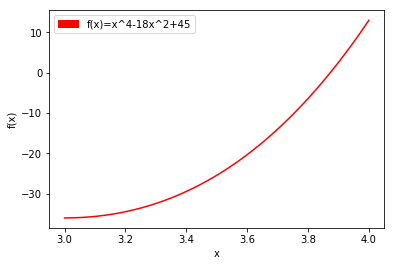

In [28]:
def f8b(x):
   f8bx = x**4.0-18.0*x**2.0 + 45.0
   return(f8bx)

x8b= np.linspace(3.0,4.0,101)
f_array8b = f8b(x8b)

plt.plot(x8b,f_array8b,'r')

red_patch = mpatches.Patch(color='red',label='f(x)=x^4-18x^2+45')
plt.legend(handles=[red_patch])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

A root where $f(x)=0$ is seen in the vicinity of $x=3.9$.

The derivative of the given function $f(x)$ is required and has already been found to be

$f'(x)=4x^{3}-36x$

Five iterations of Newton's method are performed; after trial and error, a starting value $p_{0}=3.5$ is chosen.

The order of convergence is judged by plotting the logarithm of the absolute error.

The convergence tolerance has not been met
after Nmax = 5 iterations

Approximations of the Root p:
Iteration 0: pn(0) = 3.50000000e+00
Iteration 1: pn(1) = 4.05906593e+00
Iteration 2: pn(2) = 3.89519711e+00
Iteration 3: pn(3) = 3.87335631e+00
Iteration 4: pn(4) = 3.87298345e+00
Iteration 5: pn(5) = 3.87298335e+00

Absolute Error in the Approximations p:
Iteration 0: pn(0) = 3.72983346e-01
Iteration 1: pn(1) = 1.86082588e-01
Iteration 2: pn(2) = 2.22137655e-02
Iteration 3: pn(3) = 3.72960418e-04
Iteration 4: pn(4) = 1.07701046e-07
Iteration 5: pn(5) = 9.32587341e-15


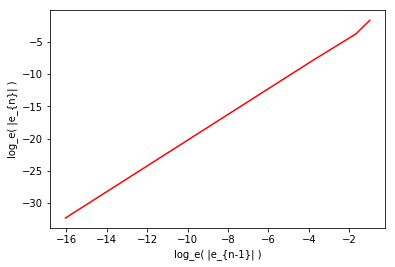

In [29]:
def fp8b(x):
   fp8bx = 4.0*x**3.0-36.0*x
   return(fp8bx)

po8b = 3.5
Nmax8b = 5
eps8b = 1.0 * 10.0**-16.0

pn8b = newton(f8b,fp8b,po8b,Nmax8b,eps8b)

print("\nApproximations of the Root p:")
for ii in range(0,len(pn8b)):
   print("Iteration {0:d}: pn({1:d}) = {2:9.8e}"\
    .format(ii,ii,pn8b[ii]))

p8b = np.sqrt(15.0)

abs_e8b = np.abs(pn8b-p8b)
print("\nAbsolute Error in the Approximations p:")
for ii in range(0,len(abs_e8b)):
   print("Iteration {0:d}: pn({1:d}) = {2:9.8e}"\
    .format(ii,ii,abs_e8b[ii]))

logabs_en8b  = np.log(abs( pn8b[1:] - p8b ))
logabs_en18b = np.log(abs( pn8b[0:-1] - p8b ))

plt.plot(logabs_en18b,logabs_en8b,'r')
plt.xlabel('log_e( |e_{n-1}| )')
plt.ylabel('log_e( |e_{n}| )')
plt.show()

The order of convergence is found from the slope of the plot to be approximately three (cubic). As in Problem 7, this is explained by the multiplicity of one at this root, shown by the nonzero derivative of the function at the root:

$f'(p)=4(\sqrt{3})^{3}-36\sqrt{3}{\approx}93.0$

For roots with a multiplicity of one, Newton's method is expected to provide at least quadratic convergence.

Unlike the root at $p=\sqrt{3}$, the second derivative of the iteration function $g(x)=x-\frac{x^{4}-18x^{2}+45}{4x^{3}-36x}$ is not zero at the root $p=\sqrt{15}$:

$g''(\sqrt{15}){\approx}0.7746$

which suggests that the convergence will not be much greater than quadratic.

The different convergence behavior between parts (a) and (b) has been explained by the multiplicity of one for each root and by the second derivatives of the iterating function $g(x)$ at the root $p$, which gave improved convergence in (a) when it evaluated to zero.

## Problem 9

The function $f(x)=sin(x)$ has a zero on the interval $(3,4)$, namely $x=\pi$. Perform five iterations of the secant method to approximate this zero, using $p_{0}=3$ and $p_{1}=4$. Determine the absolute error in each of the computed approximations. What is the apparent order of convergence? What explanation can you provide for this behavior?

Solution:

Five iterations of the Secant Method are applied to the given equation using the specified initial estimate.

The logarithm of the absolute error is plotted to estimate the order of convergence.

The convergence tolerance has not been met
after Nmax = 5 iterations

Approximations of the Root p:
Iteration 0: pn(0) = 3.00000000e+00
Iteration 1: pn(1) = 4.00000000e+00
Iteration 2: pn(2) = 3.15716279e+00
Iteration 3: pn(3) = 3.13945910e+00
Iteration 4: pn(4) = 3.14159273e+00
Iteration 5: pn(5) = 3.14159265e+00
Iteration 6: pn(6) = 3.14159265e+00

Absolute Error in the Approximations p:
Iteration 0: pn(0) = 1.41592654e-01
Iteration 1: pn(1) = 8.58407346e-01
Iteration 2: pn(2) = 1.55701389e-02
Iteration 3: pn(3) = 2.13355537e-03
Iteration 4: pn(4) = 7.43950639e-08
Iteration 5: pn(5) = 5.63993297e-14
Iteration 6: pn(6) = 0.00000000e+00


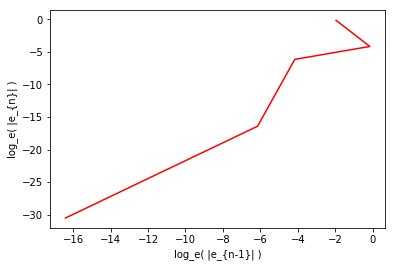

In [30]:
def f9(x):
   f9x = np.sin(x)
   return(f9x)

p09 = 3.0
p19 = 4.0
Nmax9 = 5
eps9 = 1.0 * 10.0**-16.0

pn9 = secant(f9,p09,p19,Nmax9,eps9)

print("\nApproximations of the Root p:")
for ii in range(0,len(pn9)):
   print("Iteration {0:d}: pn({1:d}) = {2:9.8e}"\
    .format(ii,ii,pn9[ii]))

p9 = np.pi

abs_e9 = np.abs(pn9-p9)
print("\nAbsolute Error in the Approximations p:")
for ii in range(0,len(abs_e9)):
   print("Iteration {0:d}: pn({1:d}) = {2:9.8e}"\
    .format(ii,ii,abs_e9[ii]))

logabs_en9  = np.log(abs( pn9[1:-1] - p9 ))
logabs_en19 = np.log(abs( pn9[0:-2] - p9 ))

plt.plot(logabs_en19,logabs_en9,'r')
plt.xlabel('log_e( |e_{n-1}| )')
plt.ylabel('log_e( |e_{n}| )')
plt.show()

The order of convergence is found from the slope of the plot to be approximately two (quadratic). This is greater than the expected order of convergence, 1.618.

The explanation for this behavior is the same as in Problem 7; the multiplicity of the root at $p=\pi$ is one, but the second derivative of the iteration function $g(x)=x-\frac{sin(x)}{cos(x)}$ is zero at the root:

$g''(p)=-\frac{sin(\pi)}{cos(\pi)}-\frac{sin^{\pi}(x)}{cos^{3}(\pi)}=0$

which explains the improved convergence.